In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


In [2]:
df = pd.read_excel('convergance_data.xlsx')

In [3]:
df.head()

,x1,x2,x3,x4,x5,y
0,1,2,3,4,5,15
1,2,3,4,5,6,20
2,3,4,5,6,7,25
3,4,5,6,7,8,30
4,5,6,7,8,9,35


In [4]:
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
print(X_scaled)

[[-1.41421356 -1.41421356 -1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356  1.41421356  1.41421356]]


In [7]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(fit_intercept=True, max_iter=1000, tol=1e-3)
model.fit(X_scaled, y.ravel())



/tmp/ipykernel_8764/1818401201.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_scaled, y.ravel())


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [8]:
print("Weights:", model.coef_)
print("Bias:", model.intercept_)

Weights: [1.41449975 1.41449975 1.41449975 1.41449975 1.41449975]
Bias: [24.64872173]


In [9]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model = SGDRegressor(
    max_iter=1,          # only 1 iteration per fit
    tol=None,            # disable auto stopping
    eta0=0.1,            # learning rate
    learning_rate='constant',
    random_state=42,
    warm_start=True      # allows multiple fit() calls to continue training
)

n_epochs = 100
loss_curve = []

for epoch in range(n_epochs):
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    loss = mean_squared_error(y, y_pred)
    loss_curve.append(loss)


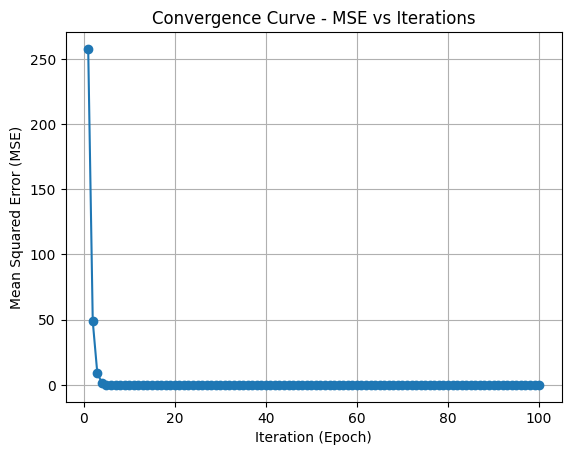

In [10]:
plt.plot(range(1, n_epochs + 1), loss_curve, marker='o')
plt.title("Convergence Curve - MSE vs Iterations")
plt.xlabel("Iteration (Epoch)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

In [13]:
import plotly.graph_objects as go
import numpy as np

# Find the minimum MSE and its iteration
min_loss = min(loss_curve)
min_index = np.argmin(loss_curve) + 1  # +1 since iterations start from 1

# Create figure
fig = go.Figure()

# Plot the main convergence curve
fig.add_trace(go.Scatter(
    x=list(range(1, len(loss_curve) + 1)),
    y=loss_curve,
    mode='lines+markers',
    name='Loss',
    line=dict(width=2)
))

# Add a vertical line at minimum loss iteration
fig.add_vline(
    x=min_index,
    line_width=2,
    line_dash="dash",
    line_color="yellow",
    annotation_text=f"Min MSE = {min_loss:.4f} (at iter {min_index})",
    annotation_position="top right"
)

# Add a marker at the minimum loss point
fig.add_trace(go.Scatter(
    x=[min_index],
    y=[min_loss],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=[f"Min: {min_loss:.4f}"],
    textposition='bottom right',
    name='Minimum Error'
))

# Layout customization
fig.update_layout(
    title='Interactive Convergence Curve with Minimum Error Highlighted',
    xaxis_title='Iteration (Epoch)',
    yaxis_title='Mean Squared Error (MSE)',
    template='plotly_dark'
)

fig.show()
